# 🧪 Earthquake Risk Mapping – Data Exploration

In this notebook, we perform exploratory data analysis (EDA) on historical earthquake data.  
We aim to understand key patterns in magnitudes, depth, spatial distribution, and temporal trends.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

# Optional: for inline plots
%matplotlib inline

# Styling
sns.set(style="whitegrid")


In [34]:
# Load earthquake data
df = pd.read_csv("../data/earthquake_data.csv")  # Adjust path if needed
df.head()


time   latitude  longitude    depth   mag magType  \
0  2025-07-28T12:01:05.160Z  38.771332  -122.7295   1.1500  1.17      md   
1  2025-07-28T11:51:12.495Z  32.365000  -102.1630   3.8480  1.90      ml   
2  2025-07-28T11:42:05.182Z  59.879500  -152.6000  82.3000  1.10      ml   
3  2025-07-28T11:38:55.810Z  61.445300  -146.6149  32.4000  1.30      ml   
4  2025-07-28T11:37:22.103Z  31.977000  -101.9890   4.3398  1.30      ml   

    nst   gap     dmin   rms  ...                   updated  \
0  14.0  65.0  0.01038  0.03  ...  2025-07-28T12:02:42.122Z   
1  58.0  53.0  0.00000  0.50  ...  2025-07-28T11:55:25.185Z   
2   NaN   NaN      NaN  0.29  ...  2025-07-28T11:44:23.032Z   
3   NaN   NaN      NaN  0.39  ...  2025-07-28T11:40:24.315Z   
4  44.0  32.0  0.10000  0.50  ...  2025-07-28T11:41:15.071Z   

                                place        type horizontalError depthError  \
0         2 km ESE of The Geysers, CA  earthquake            0.22   0.320000   
1  35 km ENE of McKinney Acres, Texas  earthquake            0.00   0.720489   
2   44 km WNW of Anchor Point, Alaska  earthquake             NaN   0.600000   
3         37 km NNW of Valdez, Alaska  earthquake             NaN   0.200000   
4          8 km ESE of Midland, Texas  earthquake            0.00   0.824726   

   magError  magNst     status  locationSource magSource  
0      0.14    13.0  automatic              nc        nc  
1      0.10    35.0  automatic              tx        tx  
2       NaN     NaN  automatic              ak        ak  
3       NaN     NaN  automatic              ak        ak  
4      0.20    31.0  automatic              tx        tx  

[5 rows x 22 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11265 entries, 0 to 11264
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             11265 non-null  object 
 1   latitude         11265 non-null  float64
 2   longitude        11265 non-null  float64
 3   depth            11265 non-null  float64
 4   mag              11264 non-null  float64
 5   magType          11264 non-null  object 
 6   nst              9365 non-null   float64
 7   gap              9363 non-null   float64
 8   dmin             9329 non-null   float64
 9   rms              11264 non-null  float64
 10  net              11265 non-null  object 
 11  id               11265 non-null  object 
 12  updated          11265 non-null  object 
 13  place            11265 non-null  object 
 14  type             11265 non-null  object 
 15  horizontalError  8811 non-null   float64
 16  depthError       11262 non-null  float64
 17  magError    

In [36]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                1900
gap                1902
dmin               1936
rms                   1
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2454
depthError            3
magError           1967
magNst             1908
status                0
locationSource        0
magSource             0
dtype: int64

In [37]:
df.describe()

latitude     longitude         depth           mag          nst  \
count  11265.000000  11265.000000  11265.000000  11264.000000  9365.000000   
mean      40.604150   -107.280588     19.274479      1.535988    25.247624   
std       16.810616     74.158660     50.118675      1.313312    22.917172   
min      -62.706500   -179.983200     -3.460000     -1.210000     0.000000   
25%       33.663667   -150.126800      2.450000      0.670000    11.000000   
50%       38.835167   -121.760333      7.032400      1.210000    18.000000   
75%       52.553300   -114.832000     13.200000      2.000000    31.000000   
max       83.282100    179.973300    663.019000      7.400000   302.000000   

               gap         dmin           rms  horizontalError    depthError  \
count  9363.000000  9329.000000  11264.000000      8811.000000  11262.000000   
mean    105.574788     0.470070      0.283586         1.735296      2.790302   
std      61.702676     1.866518      0.292787         3.144724     66.291635   
min      12.000000     0.000000      0.000000         0.000000      0.000000   
25%      65.000000     0.017550      0.080000         0.220000      0.440000   
50%      84.000000     0.050770      0.160000         0.390000      0.690000   
75%     132.000000     0.138100      0.420000         1.010000      1.679250   
max     359.000000    45.835000      1.880000        32.080000   6840.900000   

          magError       magNst  
count  9298.000000  9357.000000  
mean      0.175552    21.249973  
std       0.102386    43.010088  
min       0.000000     0.000000  
25%       0.105962     8.000000  
50%       0.163113    12.000000  
75%       0.215984    21.000000  
max       1.490000   779.000000

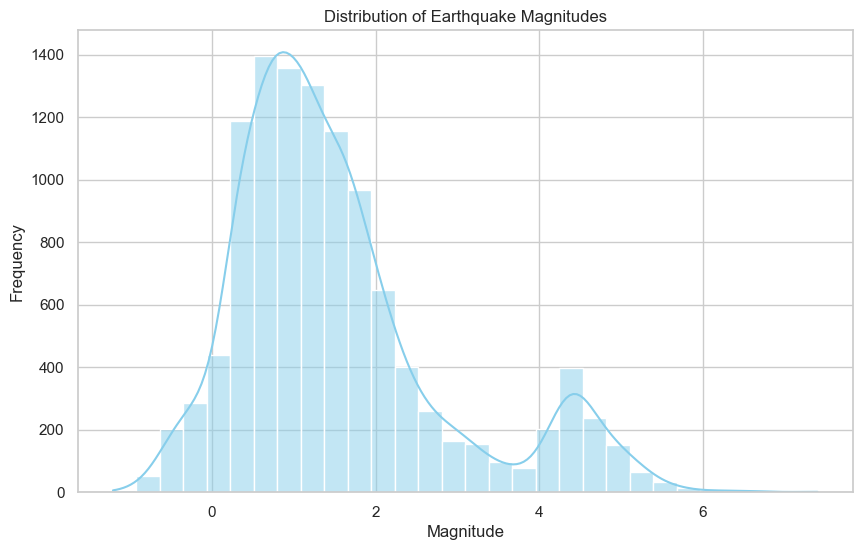

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(df['mag'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

In [39]:
# Folium map of earthquake points
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=2)

for i in range(0, len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

m

In [40]:
m.save("earthquake_map.html")

## 🌍 Earthquake Map

📌 **Interactive version:**  
[👉 Click here to view the interactive earthquake map](earthquake_map.html)

🖼️ **Static preview:**  
If you're viewing this on GitHub and cannot see the interactive map above, here's a static snapshot for reference:

📌 **Earthquake map:** 
(https://github.com/Prasanna2989/earthquake-risk-mapping/blob/master/images/map_snapshot.png)

## 💾 Save Cleaned Earthquake Data

We'll save the cleaned and preprocessed data to use it for modeling in the next notebook.


In [41]:
# OPTIONAL: Drop any unnecessary columns or fill missing values here
# Example:
df_clean = df.dropna(subset=['mag', 'depth', 'latitude', 'longitude'])

# Save to the data folder
df_clean.to_csv('../data/cleaned_earthquake_data.csv', index=False)

print("✅ Cleaned earthquake data saved successfully!")


✅ Cleaned earthquake data saved successfully!
